# Natural Language Processing - Обработка естественного языка

## Информационный поиск


<br>

---
<br>

# Прошлая лекция
* Лексический анализ
    * Лексическая единица - токен + заложенный в нем смысл
* WordNet
    * Тезаурус слов с определениями, синонимами и другими отношениями
* Разрешение лексической многозначности
    * Алгоритм Lesk
* TF-IDF
    * Term Frequency - Inversed Document Frequency
    
    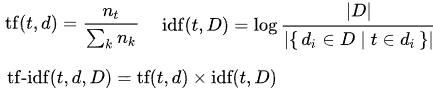

* LSA и LDA
    * Lantent Semantic Analysis = сингулярное разложение матрицы терм-документ
    * Latent Dirichlet Allocation = тематическое моделирование через распределения документов по темам и распределения тем по словам 

<br>

---
<br>

# План на сегодня
* **Информационный поиск**
* Инвертированный индекс
* Метрики ранжирования
* Исправление орфографии


## Информационный поиск

Поиск информации (Information Retrieval) представляет собой процесс выявления в некотором множестве документов (текстов) всех тех, которые посвящены указанной теме (предмету), удовлетворяют заранее определенному условию поиска (запросу) или содержат необходимые (соответствующие информационной потребности) факты, сведения, данные.

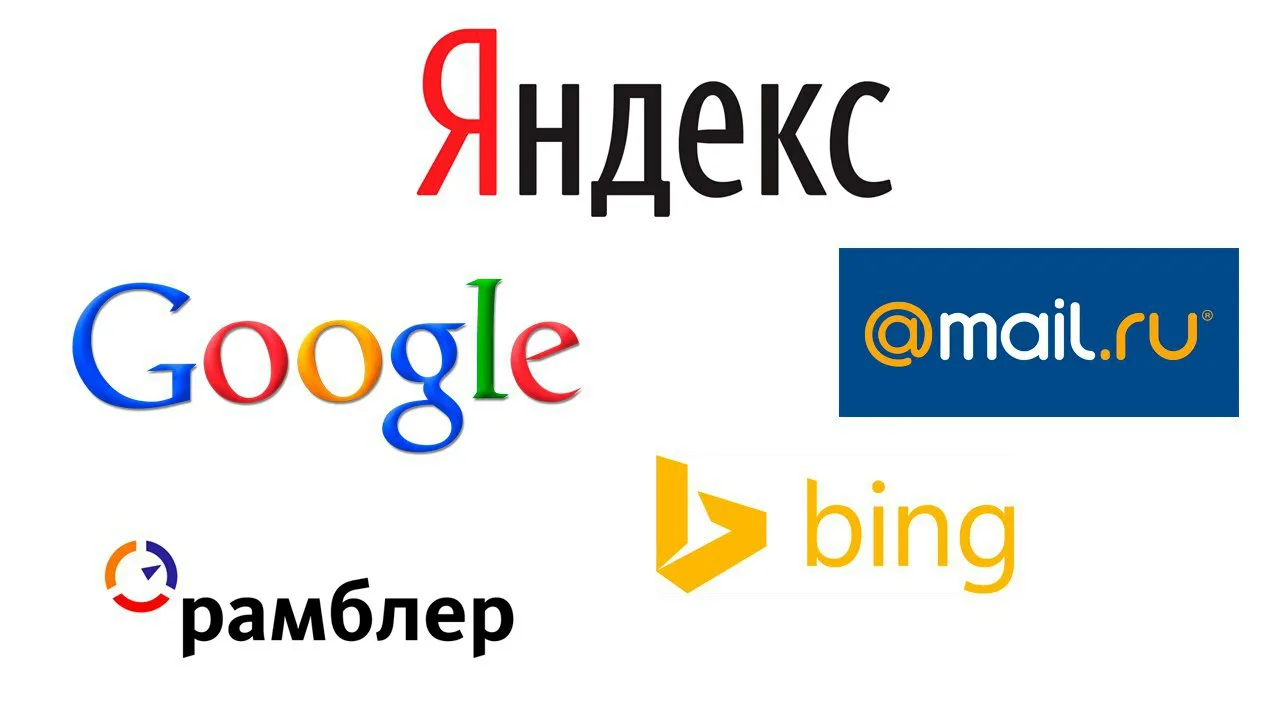

### Что необходимо для поиска информации?
* представить запрос в понятном компьютеру виде
* представить документы в понятном компьютеру виде
* алгоритм или модель поиска
* метрика для ранжирования релевантности


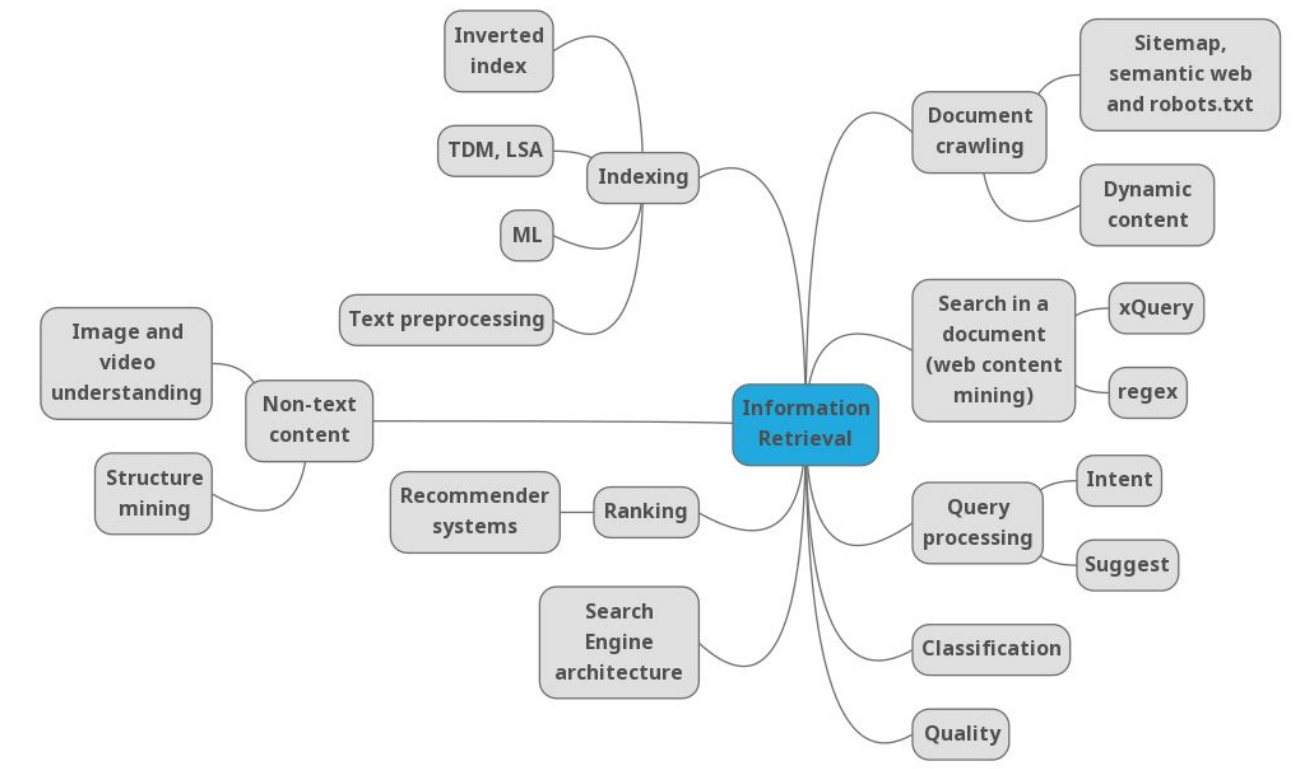

<br>

---
<br>

# План на сегодня
* Информационный поиск
* **Инвертированный индекс**
* Метрики ранжирования
* Исправление орфографии


## Инвертированный индекс

Допустим мы хотим получить документы, которые содержат одни слова, и не содержат другие. Такой поиск называется Boolean Retrieval.

Примеры запроса: 
* "Intel **and** 13700K **and not** 13600K"
* "температура **and** сыпь **and not** кашель"
* "инвертированный" **and** "индекс"

Искать слова во всех документах на каждый запрос не эффективно.

Эффективней же было бы заранне знать для каждого слова список документов, в которых оно встречается.
* Такая структура данных называется Инвертированный индекс.

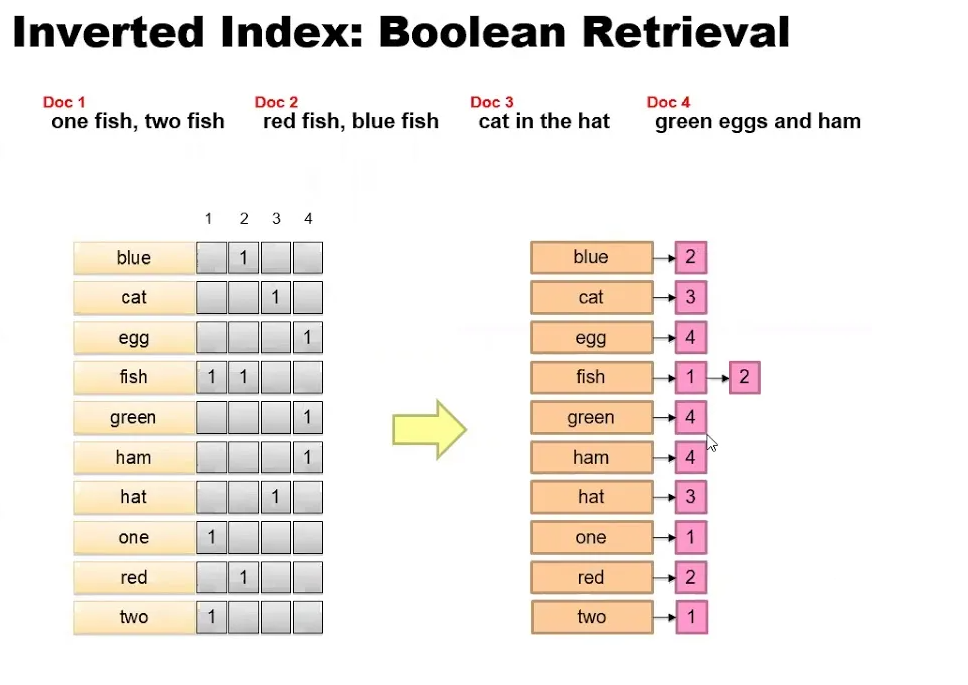

Тогда процедура поиска будет следующей:
1. Для каждого слова из запроса получить список документов из инвертированного индекса
1. В зависимости от операции производить:
  * **and**: пересечение множеств документов
  * **or**: объединение множеств документов
  * **not**: вычитание множеств документов
1. Вывести оставшиеся документы

Проблемы:
* Запрос может содержать слишком много слов, из-за чего ни один документ не подойдет
* Запрос может содержать мало слов, из-за чего получим слишком много нерелевантных документов
* Не все люди готовы писать Boolean запросы
* Полученные документы не одинаково полезны

Альтернатива - **ранжирование** документов по метрике релевантности запросу.

Ранжирование ответов имеет следующие преимущества над Boolean model:
* Релевантность - непрерывная мера
  * Пользователям проще придумать запрос
* Пользователь может перестать листать на любом документе
  * Количество документов в выдаче контролируется пользовтелем, а не алгоритмом

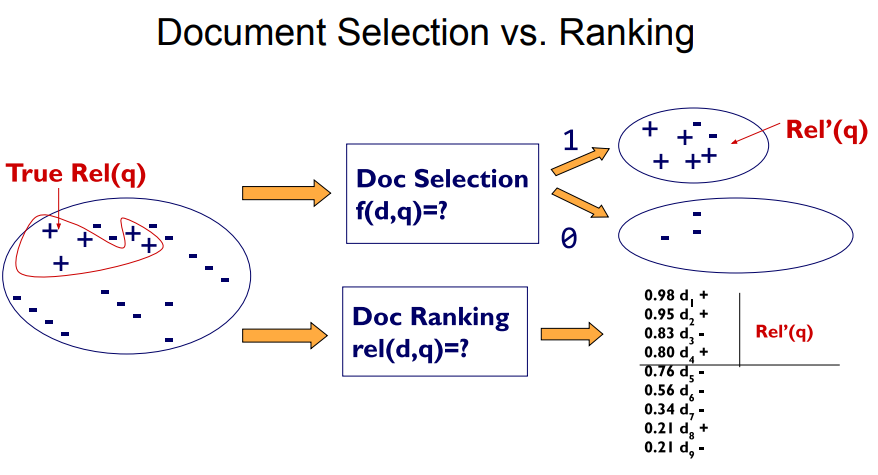

In [ ]:
!wget http://www.daviddlewis.com/resources/testcollections/reuters21578/reuters21578.tar.gz
!tar -xvzf reuters21578.tar.gz

--2023-05-22 09:11:14--  http://www.daviddlewis.com/resources/testcollections/reuters21578/reuters21578.tar.gz
Resolving www.daviddlewis.com (www.daviddlewis.com)... 69.5.12.62
Connecting to www.daviddlewis.com (www.daviddlewis.com)|69.5.12.62|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8150596 (7.8M) [application/x-tar]
Saving to: ‘reuters21578.tar.gz.1’

reuters21578.tar.gz 100%[===================>]   7.77M  7.72MB/s    in 1.0s    

2023-05-22 09:11:16 (7.72 MB/s) - ‘reuters21578.tar.gz.1’ saved [8150596/8150596]

README.txt
all-exchanges-strings.lc.txt
all-orgs-strings.lc.txt
all-people-strings.lc.txt
all-places-strings.lc.txt
all-topics-strings.lc.txt
cat-descriptions_120396.txt
feldman-cia-worldfactbook-data.txt
lewis.dtd
reut2-000.sgm
reut2-001.sgm
reut2-002.sgm
reut2-003.sgm
reut2-004.sgm
reut2-005.sgm
reut2-006.sgm
reut2-007.sgm
reut2-008.sgm
reut2-009.sgm
reut2-010.sgm
reut2-011.sgm
reut2-012.sgm
reut2-013.sgm
reut2-014.sgm
reut2-015.sgm
reut2-016

In [ ]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!cat reut2-021.sgm

<!DOCTYPE lewis SYSTEM "lewis.dtd">
<REUTERS TOPICS="NO" LEWISSPLIT="TEST" CGISPLIT="TRAINING-SET" OLDID="20436" NEWID="21001">
<DATE>19-OCT-1987 15:37:46.03</DATE>
<TOPICS></TOPICS>
<PLACES></PLACES>
<PEOPLE></PEOPLE>
<ORGS></ORGS>
<EXCHANGES></EXCHANGES>
<COMPANIES></COMPANIES>
<UNKNOWN> 
&#5;&#5;&#5;F 
&#22;&#22;&#1;f2882&#31;reute
f f BC-CITYFED-FINANCI   10-19 0013</UNKNOWN>
<TEXT TYPE="BRIEF">&#2;
******<TITLE>CITYFED FINANCIAL CORP SAYS IT CUT QTRLY DIVIDEND TO ONE CENT FROM 10 CTS/SHR
</TITLE>Blah blah blah.
&#3;

</TEXT>
</REUTERS>
<REUTERS TOPICS="YES" LEWISSPLIT="TEST" CGISPLIT="TRAINING-SET" OLDID="20435" NEWID="21002">
<DATE>19-OCT-1987 15:35:53.55</DATE>
<TOPICS><D>crude</D><D>ship</D></TOPICS>
<PLACES><D>bahrain</D><D>iran</D><D>usa</D></PLACES>
<PEOPLE></PEOPLE>
<ORGS></ORGS>
<EXCHANGES></EXCHANGES>
<COMPANIES></COMPANIES>
<UNKNOWN> 
&#5;&#5;&#5;Y 
&#22;&#22;&#1;f2873&#31;reute
r f AM-GULF-PLATFORM   10-19 0101</UNKNOWN>
<TEXT>&#2;
<TITLE>HUGE OIL PLATFORMS DOT GULF LIK

In [ ]:
import glob
import heapq
import math
import os
import re
from collections import Counter, defaultdict

from bs4 import BeautifulSoup
from tqdm.notebook import tqdm


stop_words = {'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from', 'has', 'he', 'in', 'is', 'it', 'its',
              'of', 'on', 'that', 'the', 'to', 'was', 'were', 'will', 'with'}
ps = nltk.stem.PorterStemmer()


def preprocess(text):
    tokenized = nltk.word_tokenize(text.lower())
    return [ps.stem(w) for w in tokenized 
            if w not in stop_words and w.isalpha()]


def build_index():
    """
    # функция стоит инвертированный индекс на данных документах - reuters21578
    # собирает 3 словаря:
    # index - term: [term_frequency, (doc_id_1, doc_freq_1), (doc_id_2, doc_freq_2), ...]
    # doc_lengths - doc_id: doc_length
    # documents - doc_id: doc_content_clean
    """
    index = defaultdict(lambda: [0])
    doc_lengths = dict()
    documents = dict()
    id = 0
    for p in tqdm(sorted(glob.glob("*.sgm")), total=22):
        with open(p, encoding="latin - 1") as f:
            reuter_content = f.read()

        soup = BeautifulSoup(reuter_content, "html.parser")
        articles = soup.find_all('reuters')

        for a in articles:
            id = int(a['newid'])
            if a.title is not None and a.body is not None:
                raw = a.title.string + "\n" + a.body.string
            elif a.body is not None:
                raw = a.body.string
            else:
                raw = ""

            terms = preprocess(raw)
            doc_lengths[id] = len(terms)
            documents[id] = raw
            counts = Counter(terms)
            for t, c in counts.items():
                index[t][0] += c
                index[t] += [(id, c)]

    return index, doc_lengths, documents


def answer_query(raw_query, index, doc_lengths, documents, top_k, scoring_fnc):
    """
    :param raw_query: необработанный запрос пользователя
    :param top_k: сколько вернуть результатов
    :param scoring_fnc: cosine/okapi
    :return: список ids полученных документов (top_k)
    """
    # предобработать запрос так же, как и документы
    query = preprocess(raw_query)
    # посчитать частоты слов
    query = Counter(query)
    # посчитать скоры документов
    scores = scoring_fnc(query, doc_lengths, index)
    # положить их в структуру данных heapq (куча) для удобного извлечения top k элементов
    h = []
    for doc_id in scores.keys():
        neg_score = -scores[doc_id]
        heapq.heappush(h, (neg_score, doc_id))
    # извлекаем лучшие результаты
    top_k = min(top_k, len(h))  # на случай если результатов меньше, чем top k
    print('\033[1m\033[94mОТВЕТ НА ЗАПРОС:', raw_query, 'METHOD:', scoring_fnc.__name__, '\033[0m')
    print(top_k, "results retrieved")
    top_k_ids = []
    for k in range(top_k):
        best_so_far = heapq.heappop(h)
        top_k_ids.append(best_so_far)
        article = documents[best_so_far[1]]
        article_terms = nltk.word_tokenize(article)
        intersection = [t for t in article_terms if t not in stop_words and t.isalpha() and ps.stem(t) in query.keys()]
        for term in intersection:  # подсветить слова из запроса в тексте
            article = re.sub(r'(' + term + ')', r'\033[1m\033[91m\1\033[0m', article, flags=re.I)
        print("-------------------------------------------------------")
        print(article)

    return top_k_ids

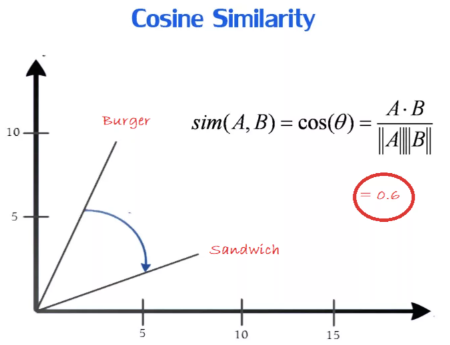

Косинусная близость — это мера сходства между двумя векторами пространства внутреннего произведения.
* измерение сходства между вектором запроса и вектором документа
* варьируется от 0 до 1, где 0 означает отсутствие сходства, а 1 означает полное совпадение
* считается из угла между двумя векторами, меньше угол - выше близость.

Плюсы косинусной близости:
* простота и легкость реализации
* эффективность обработки многомерных данных, что характерно для текстовых систем поиска информации

In [ ]:
def cosine_scoring(query, doc_lengths, index):
    """
    Вычисляет скоры для всех документов, содержащих любое из слов запроса 
    в соответствии с косинусной близостью TF-IDF векторов запроса и документа

    :param query: dictionary - term:frequency
    :return: dictionary of scores - doc_id:score
    """
    scores = dict()
    for d in doc_lengths.keys():
        scores[d] = 0

    for t, qtf in query.items():
        if t not in index:
            continue
        idf = math.log10(len(doc_lengths) / len(index[t][1:]))

        for d, dtf in index[t][1:]:
            scores[d] += idf * idf * qtf * dtf

    for d in scores.keys():
        if doc_lengths[d] != 0:
            scores[d] /= doc_lengths[d]
    return scores

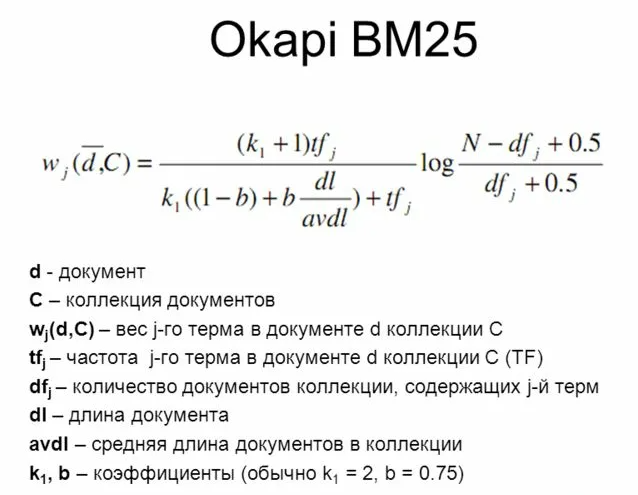

Okapi BM25 — это метод вероятностного ранжирования, использующий статистическую модель для оценки релевантности документа запросу.
* учитывает частоту каждого термина в документе, длину документа и обратную частоту документа для каждого термина в коллекции
* варьируется от 0 до бесконечности, где более высокие оценки указывают на более высокую релевантность.

Из плюсов Okapi BM25 - учитывает как частоту терминов в документе, так и их частоту в коллекции, что улучшает качество для редких терминов и документов различной длины.

In [ ]:
def okapi_scoring(query, doc_lengths, index, k1=1.2, b=0.75):
    """
    Вычисляет скоры для всех документов, содержащих любое из слов запроса 
    в соответствии с Okapi BM25

    :param query: dictionary - term:frequency
    :return: dictionary of scores - doc_id:score
    """
    scores = dict()
    for d in doc_lengths.keys():
        scores[d] = 0

    avgdl = sum(doc_lengths.values()) / len(doc_lengths)

    for t, qtf in query.items():
        if t not in index:
            continue
        df = len(index[t][1:])
        idf = math.log10((len(doc_lengths) - df + 0.5) / (df + 0.5))

        for (d, dtf) in index[t][1:]:
            scores[d] += idf * dtf * (k1 + 1) / (dtf + k1 * (1 - b + b * doc_lengths[d] / avgdl))
    return scores

In [ ]:
index, doc_lengths, documents = build_index()

  0%|          | 0/22 [00:00<?, ?it/s]

In [ ]:
answer_query("black monday", index, doc_lengths, documents, 4, cosine_scoring)

ОТВЕТ НА ЗАПРОС: black monday METHOD: cosine_scoring 
4 results retrieved
-------------------------------------------------------
CORROON AND BLACK <CBL> COMPLETE ACQUISITION
Corroon and Black Corp said it
completed the acuqisition of <Contractors Planning Group Inc>
in an exchange of shares.
    Contractors is headquartered in Garden City, N.Y., and has
branch offices in Philadelphia, Boston, and Cheshire, Conn.
 Reuter

-------------------------------------------------------
KANSAS POWER/LIGHT <KAN> NAMES CHIEF EXECUTIVE
Kansas Power and Light Co said it
named David Black as chief executive officer. It said he will
succeed William Wall after the May Five annual meeting.
    It said Black is the company's senior vice president, law.
 Reuter

-------------------------------------------------------
CORROON AND BLACK <CBL> COMPLETES ACQUISITION
Carroon and Black Corp said it
completed the acquisition of <Poggi-Harrison Agency Inc> and
<Risk Control Inc>.
    Terms of the acquisitions w

[(-0.42830103344487136, 14154),
 (-0.35042811827307657, 15282),
 (-0.3304036543717579, 7234),
 (-0.3212257750836535, 1586)]

In [ ]:
answer_query("black monday", index, doc_lengths, documents, 2, okapi_scoring)

ОТВЕТ НА ЗАПРОС: black monday METHOD: okapi_scoring 
2 results retrieved
-------------------------------------------------------
POLL SHOWS AMERICANS HOLD ON TO STOCKS AFTER DROP
The "Black Monday" stock market crash
failed to destroy Americans' faith in the economic soundness of
the country, according to a poll released on Tuesday.
    The ABC-Washington Post poll, taken after the close of
stock trading on Monday, showed 58 pct did not believe the
unprecedented slide in stock prices foretold an economic
downturn, and 70 pct rejected the notion the country faced a
1930s-style Depression.
    Fifty-three pct of those interviewed said they had owned
stocks at some point, and only one pct said they had sold any
as a result of Monday's decline.
    Of the 40 pct who currently held stocks, only two pct said
they planned to sell some and four pct said they planned to
buy.
    The poll of 507 men and women was taken by telephone on
Monday night, after the Dow Jones Industrial Average plunged


[(-4.95738169397165, 20855), (-4.367334435262174, 20007)]

In [ ]:
answer_query("apple personal computer", index, doc_lengths, documents, 2, cosine_scoring)

ОТВЕТ НА ЗАПРОС: apple personal computer METHOD: cosine_scoring 
2 results retrieved
-------------------------------------------------------
APPLE <AAPL> EXPANDS NETWORK CAPABILITIES
Apple Computer Inc said it
has extended the ability of the Apple MacIntosh personal
computer family to commmunicate over <Northern Telecom Ltd's>
Meridian SL-1 integrated services network.
    The new capabilities include linking separate AppleTalk
networks, dial-up remote use of LaserWriter printers, one step
file transfer and conversion and Memorybank 485, a new 485
megabyte storage subsystem for use with MacIntosh personal
computers, Apple said.
 Reuter

-------------------------------------------------------
COMPAQ COMPUTER <CPQ> HAS NEW DESKTOP COMPUTER
Compaq Computer Corp said it has
introduced a new 12 megahertz desktop personal computer called
the Compaq Deskpro 286R.
 More



[(-0.8940526878290903, 11050), (-0.6829238035190632, 3033)]

In [ ]:
answer_query("apple personal computer", index, doc_lengths, documents, 2, okapi_scoring)

ОТВЕТ НА ЗАПРОС: apple personal computer METHOD: okapi_scoring 
2 results retrieved
-------------------------------------------------------
APPLE <AAPL> EXPANDS NETWORK CAPABILITIES
Apple Computer Inc said it
has extended the ability of the Apple MacIntosh personal
computer family to commmunicate over <Northern Telecom Ltd's>
Meridian SL-1 integrated services network.
    The new capabilities include linking separate AppleTalk
networks, dial-up remote use of LaserWriter printers, one step
file transfer and conversion and Memorybank 485, a new 485
megabyte storage subsystem for use with MacIntosh personal
computers, Apple said.
 Reuter

-------------------------------------------------------
DIGITAL COMMUNICATIONS <DCAI> INTRODUCES ITEMS
Digital Communications Associates
Inc said it introduced four new personal computer
communications products, including equipment designed for the
recently anounced International Business Machines Corp <IBM>
personal system/2, and Apple Computer Inc's <

[(-10.671436603292321, 11050), (-9.511254223519103, 17851)]

### Нужно ли ограничиваться словами?

Можем построить инвертированный индекс на основе подслов:
* полезно для морфологически богатых языков
  * нужно ли считать слова с одним корнем по-отдельности?
* позволяет обрабатывать запросы с опечатками

PMI двух исходов x и y, принадлежащих дискретным случайным величинам X и Y, количественно определяет несоответствие между вероятностью их совпадения при заданном совместном распределении и вероятностью их совпадения при различных независимых распределениях:

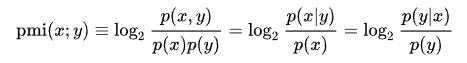

In [ ]:
import nltk


def find_ngrams_PMI(tokenized_text, freq_thresh, pmi_thresh, n):
    """
    Найти n-грамы в тексте, ограниченные частотой и значением pmi (pointwise mutual information)
    :param tokenized_text: токенизированный текст
    :param freq_thresh: число, рассматривать только n-грамы с частотой выше данного порога
    :param pmi_thresh: число, рассматривать только n-грамы с pmi выше данного порога
    :param n: длина n-грам, 2 или 3
    :return: набор из n-грам кортежей (tuples) - {('ngram1_1', 'ngram1_2'), ('ngram2_1', 'ngram2_2'), ... }
    """
    if n == 2:
        bigram_measures = nltk.collocations.BigramAssocMeasures()
        finder = nltk.BigramCollocationFinder.from_words(tokenized_text)
        finder.apply_freq_filter(freq_thresh)
        return set(finder.above_score(bigram_measures.pmi, pmi_thresh))
    else:
        trigram_measures = nltk.collocations.TrigramAssocMeasures()
        finder = nltk.TrigramCollocationFinder.from_words(tokenized_text)
        finder.apply_freq_filter(freq_thresh)
        return set(finder.above_score(trigram_measures.pmi, pmi_thresh))


def build_ngram_index(tokenized_documents, ngrams):
    """
    Функция строит n-грамный индекс для заданной коллекции документов
    :param tokenized_documents: {doc1_id: ['token1', 'token2', ...], doc2_id: ['token1', 'token2', ...]}
    :param ngrams: набор из n-грам кортежей - {('ngram1_1', 'ngram1_2'), ('ngram2_1', 'ngram2_2', 'ngram2_3'), ... }
    :return: словарь - {ngram_tuple :[ngram_tuple_frequency, (doc_id_1, doc_freq_1), (doc_id_2, doc_freq_2), ...], ...}
    """
    index = dict()

    for id, d in tokenized_documents.items():
        for g in ngrams:
            c = 0
            for i in range(len(d) - len(g) + 1):
                b = True
                for j in range(len(g)):
                    b &= d[i + j] == g[j]
                c += 1 if b else 0

            if c == 0:
                continue

            if g in index:
                index[g][0] += c
            else:
                index[g] = [c]
            index[g] += [(id, c)]
    return index

In [ ]:
import nltk

nltk.download("brown")

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
from collections import defaultdict
from nltk.corpus import brown

fileids = brown.fileids()[:10]
ngrams = find_ngrams_PMI(brown.words(fileids=fileids), 2, 10, 2)

In [ ]:
print(next(iter(ngrams)))

('reportedly', 'received')


In [ ]:
i = iter(ngrams)
print(next(i))
print(next(i))
print(next(i))
print(next(i))
print(next(i))
print(next(i))
print(next(i))
print(next(i))
print(next(i))
print(next(i))

('reportedly', 'received')
('Rural', 'Roads')
('Stage', '1')
('professional', 'posts')
('privilege', 'resolution')
('De', 'Sapio')
('Science', 'degree')
('Full', 'payment')
('23d', 'ward')
('Ivan', 'Allen')


In [ ]:
data = defaultdict(list)
for fid in fileids:
    data[fid] = brown.words(fid)

ngram_index = build_ngram_index(data, ngrams)

In [ ]:
print(next(iter(ngram_index.items())))

(('reportedly', 'received'), [2, ('ca01', 1), ('ca09', 1)])


## Query expansion

Процесс переформулирования данного запроса для повышения производительности поиска при операциях по поиску информации, особенно в контексте понимания запроса.

Суть:
* расширить запрос синонимами и/или антонимами
* лицезреть улучшение качества

Как:
* WordNet - синонимы, антонимы, гипонимы, гипернимы
* WordNet - определения слов
* pymorphy2 - другие морфологические формы слова
* исправление орфографии

<br>

---
<br>

# План на сегодня
* Информационный поиск
* Инвертированный индекс
* **Метрики ранжирования**
* Исправление орфографии


## Метрики ранжирования

Цель метрики качества ранжирования — определить, насколько полученные алгоритмом оценки релевантности и соответствующая им перестановка соответствуют истинным значениям релевантности.

MAP (Mean Average Precision), NDCG (Normalized Discounted Cumulative Gain), 11-point interpolated average, and MRR (Mean Reciprocal Rank) — все это метрики, используемые для измерения эффективности систем поиска информации.

Mean Average Precision:

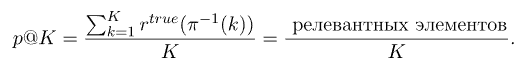

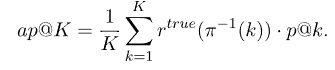

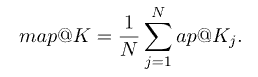

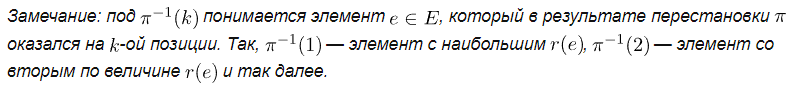

- Измеряет среднюю точность системы по нескольким запросам
- Учитывает как precision, так и recall
- Предполагает, что релевантные документы должны ранжироваться выше, чем нерелевантные
- Может быть чувствителен к количеству извлеченных релевантных документов

Normalized Discounted Cumulative Gain:

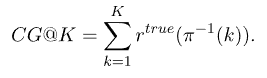

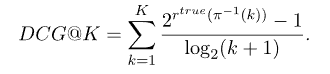

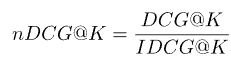

- Измеряет качество ранжирования документов в системе
- Учитывает положение каждого соответствующего документа в ранжированном списке
- нормируется идеальным ранжированием, которое предполагает, что все релевантные документы ранжируются вверху
- Обычно используется в поисковых системах

11-point interpolated average:

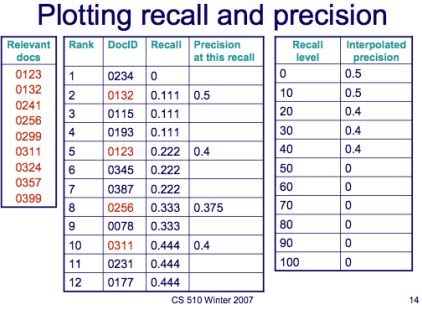

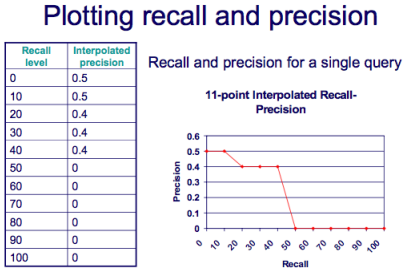

- Измеряет точность системы при разных значениях recall
- Делит ось recall на 11 точек и вычисляет precision в каждой точке
- Не учитывает положение соответствующих документов в ранжированном списке

Mean Reciprocal Rank:

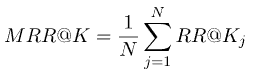

- RR - обратный ранк (1 / k) первого релевантного документа в выдаче
- Измеряет средний рейтинг первого релевантного документа, полученного системой
- Предполагает, что соответствующие документы должны быть извлечены как можно раньше
- Обычно используется в Question-Answering

Таким образом, MAP и NDCG учитывают как precision, так и recall, в то время как 11-point average и MRR больше фокусируются на precision и местоположении соответствующих документов в ранжированном списке соответственно.
* Выбор метрики зависит от задачи

[Метрики качества ранжирования (Хабр)](https://habr.com/ru/company/econtenta/blog/303458/)

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import json


def mean_avg_precision(top_k_results, relevance):
    """
    relevance документа либо 0, либо 1
    :param top_k_results: list of lists of ranked results for each query [[doc_id1, doc_id2,...], ...]
                          the i-th result corresponds to (i+1)-th query_id. There may be less than top_k
                          results returned for a query, but never more.
    :param relevance: dict, query_id:[(relevant_doc_id1, score1), (relevant_doc_id2, score2), ...]
    :return: calculated MAP score
    """
    ap = []
    for qi, docs in enumerate(top_k_results):
        p = []
        cum_rel = 0
        relevant = dict(relevance[qi + 1])
        for i, d in enumerate(docs):
            if d in relevant:
                cum_rel += 1
                p.append(cum_rel / (i + 1))
        ap.append(np.mean(p) if len(p) > 0 else .0)
    return np.mean(ap)


def NDCG(top_k_results, relevance, top_k):
    """
    relevance документа может быть больше 1
    :param top_k_results: list of lists of ranked results for each query [[doc_id1, doc_id2,...], ...]
                          the i-th result corresponds to (i+1)-th query_id. There may be less than top_k
                          results returned for a query, but never more.
    :param relevance: dict, query_id:[(relevant_doc_id1, score1), (relevant_doc_id2, score2), ...]
    :param top_k: (max) number of results retrieved for each query, use this value to find normalization
                  factor for each query
    :return: NDCG score
    """

    ndcg = []
    for qi, docs in enumerate(top_k_results):
        p = 0
        scores = []
        relevant = dict(relevance[qi + 1])
        for i, d in enumerate(docs[:top_k]):
            if d in relevant:
                r = 5 - relevant[d]
                scores.append(r)
                p += (2**r - 1) / np.log2(i + 2)

        for d in relevant.keys():
            if d not in docs:
                scores.append(5 - relevant[d])

        z = 0
        for i, r in enumerate(sorted(scores, reverse=True)):
            z += (2**r - 1) / np.log2(i + 2)

        ndcg.append(p / z if z > 0 else .0)
    return np.mean(ndcg)


def eleven_points_interpolated_avg(top_k_results, relevance, plot=True):
    """
    relevance документа либо 0, либо 1
    :param top_k_results: list of lists of ranked results for each query [[doc_id1, doc_id2,...], ...]
                          the i-th result corresponds to (i+1)-th query_id. There may be less than top_k
                          results returned for a query, but never more.
    :param relevance: dict, query_id:[(relevant_doc_id1, score1), (relevant_doc_id2, score2), ...]
    :param plot: whether to plot the graph or not
    :return: interpolated_avg, list of 11 values
    """
    interpolated_avg = [[] for _ in range(11)]

    for qi, docs in enumerate(top_k_results):
        p = []
        cum_rel = 0
        relevant = dict(relevance[qi + 1])
        for i, d in enumerate(docs):
            if d in relevant:
                cum_rel += 1
            p += [(cum_rel / len(relevant), cum_rel / (i + 1))]
        p = sorted(p)

        rec = 0
        for j in range(11):
            i = 0
            while i < len(p) and p[i][0] < rec:
                i += 1

            if i < len(p):
                pr = max(list(zip(*p[i:]))[1])
                interpolated_avg[j].append(pr)
            rec += 0.1

    interpolated_avg = [np.mean(p) for p in interpolated_avg]
    return interpolated_avg


def mean_reciprocal_rank(top_k_results, relevance):
    """
    relevance либо 0, либо 1
    :param top_k_results: list of lists of ranked results for each query [[doc_id1, doc_id2,...], ...]
                          the i-th result corresponds to (i+1)-th query_id. There may be less than top_k
                          results returned for a query, but never more.
    :param relevance: dict, query_id:[(relevant_doc_id1, score1), (relevant_doc_id2, score2), ...]
    :return: calculated MAP score
    """
    rrs = []
    for qi, docs in enumerate(top_k_results):
        rank = -1
        relevant = dict(relevance[qi + 1])
        for i, d in enumerate(docs):
            if d in relevant:
                rank = i + 1
                break
        rrs.append(1 / rank if rank > 0 else .0)
    return np.mean(rrs)

<br>

---
<br>

# План на сегодня
* Информационный поиск
* Инвертированный индекс
* Метрики ранжирования
* **Исправление орфографии**


## Исправление орфографии

Опечатки вездесущи, и мы можем лишь пытаться их исправлять.

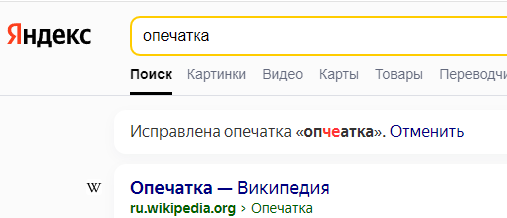

Методы исправления опечаток:
* [Решение Норвига](https://www.norvig.com/spell-correct.html)
* Построить инвертированный индекс на буквах и подсловах
* По произношению - Soundex

### Решение Норвига

In [ ]:
!wget https://www.norvig.com/big.txt

--2023-05-22 09:41:39--  https://www.norvig.com/big.txt
Resolving www.norvig.com (www.norvig.com)... 158.106.138.13
Connecting to www.norvig.com (www.norvig.com)|158.106.138.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6488666 (6.2M) [text/plain]
Saving to: ‘big.txt.1’

big.txt.1           100%[===================>]   6.19M  36.7MB/s    in 0.2s    

2023-05-22 09:41:40 (36.7 MB/s) - ‘big.txt.1’ saved [6488666/6488666]



In [ ]:
! cat big.txt

Выходные данные были обрезаны до нескольких последних строк (5000).
Mississippi, above the falls of St. Anthony. Some had been still farther
north, in Canada. Still others had wandered from the South--the Gulf of
Mexico, the Red River, and the Spanish country. French boatmen and
trappers, Spanish traders from the Southwest, Virginia planters with
their droves of slaves mingled with English, German, and Scotch-Irish
farmers. Hunters, forest rangers, restless bordermen, and squatters,
like the foaming combers of an advancing tide, went first. Then followed
the farmers, masters of the ax and plow, with their wives who shared
every burden and hardship and introduced some of the features of
civilized life. The hunters and rangers passed on to new scenes; the
home makers built for all time.

=The Number of Immigrants.=--There were no official stations on the
frontier to record the number of immigrants who entered the West during
the decades following the American Revolution. But travelers of

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



moral  dishonest  yawning  mustache  supplement  whirlwind  clash  terence  lamentable  bennett  farthing  speck  biscuit  appellation  gdp  reserves  uncouth  birch  armchair  judy  greasy  leaden  dough  lining  cleverness  ascetic  clutch  krishna  embark  quotations  friendliness  liberally  trance  untrue  rejection  grating  hanover  inexperienced  mon  wintry  stalwart  meats  stamping  variance  apiece  firmament  absorption  apprehensive  terminate  wilful  conveniently  'n'  cleanliness  collective  angela  filth  philippines  timely  herein  ignoble  canton  lamentations  moslem  ware  adjective  glen  invade  livid  buggy  prolong  weaken  folio  dismissal  quay  enchanting  heave  purified  syrian  significantly  experimental  film  repressed  cooperation  sequel  wench  calves  
Retrieved from "http //en wiktionary org/wiki/Wiktionary Frequency_lists/PG/ / / "

def g():
  global big
  big = file('big.txt').read()
  N = len(big)
  s = set()
  for i in xrange(6, N):
    c =

In [ ]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [ ]:
correction('poplation')

'population'

Из минусов - не учитывает контекст:
* "сел на ствл" -> "стул"
* "сел за ствл" -> "стол"

### Инвертированный индекс на буквах и подсловах

Как мы искали документы по словам, также можно искать и слова по буквам и слогам (подслово, subword, ngram).

K-грам индекс
* для каждого слова из датасета
* представить слово как `$слово$`
* разделить на k-грамы (допустим k=3)
  * `$сл`, `сло`, `лов`, `ово`, `во$`
* для каждой k-грамы добавить слово в индекс
  * `index["$сл"].append("слово")`


Получим:
```
{
  "$сл": [слово, случай, ...],
  "сло": [слово, весло, ...],
  "лов": [слово, олово, ...],
  ...
}
```

In [ ]:
import nltk

nltk.download("brown")
nltk.download('stopwords')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from collections import defaultdict

from nltk.corpus import brown, stopwords


def build_k_gram_index(dictionary, k):
    """
    Build index of k-grams for dictionary words. Padd with '$' ($word$) before splitting to k-grams
    :param dictionary: dictionary of original words
    :param k: number of symbols in one gram
    :return: {'gram1': ['word1_with_gram1', 'word2_with_gram1', ...],
              'gram2': ['word1_with_gram2', 'word2_with_gram2', ...], ...}
    """
    index = dict()
    for w in dictionary:
        wl = '$' + w + '$'
        k_grams = [wl[i:i + k] for i in range(len(wl) - k + 1)]
        k_grams = set([g for g in k_grams if '*' not in g])
        for g in k_grams:
            if g in index:
                index[g].append(w)
            else:
                index[g] = [w]
    return index


def generate_wildcard_options(wildcard, k_gram_index):
    """
    For a given wildcard return all words matching it using k-grams
    Don't forget to pad wildcard with '$', when appropriate
    :param wildcard: query word in a form of a wildcard
    :param k_gram_index:
    :return: list of options (matching words)
    """
    k = len(next(iter(k_gram_index)))
    wildcard = '$' + wildcard + '$'
    k_grams = [wildcard[i:i + k] for i in range(len(wildcard) - k + 1)]
    k_grams = set([g for g in k_grams if '*' not in g])

    words = set()
    init = False
    for g in k_grams:
        if g in k_gram_index and init:
            words &= set(k_gram_index[g])
        elif g in k_gram_index:
            words = set(k_gram_index[g])
            init = True
        else:
            words = set()
            break

    wildcard = '^' + wildcard.replace("*", ".*")[1:]
    matcher = re.compile(wildcard)
    words = [w for w in words if matcher.match(w)]
    return words

In [ ]:
stop_words = set(stopwords.words('english'))

dictionary = defaultdict(int)
for w in brown.words():
    w = w.lower()
    if w not in stop_words and w.isalpha():
        dictionary[w] += 1

In [ ]:
k_gram_index = build_k_gram_index(dictionary, 3)

In [ ]:
set(k_gram_index["uld"]).intersection(k_gram_index["ld$"])

{'could', 'gould', 'mould', 'ould', 'shuld', 'would'}

In [ ]:
generate_wildcard_options("*uld", k_gram_index)

['mould', 'shuld', 'ould', 'could', 'would', 'gould']

In [ ]:
generate_wildcard_options("c*od", k_gram_index)

['cod', 'childhood', 'carwood', 'collingwood', 'catherwood', 'clod']

In [ ]:
chilthood -> [*hildhood, ... childhoo*]

### Soundex

Soundex — это фонетический алгоритм, разработанный для сопоставления фамилий, которые пишутся по-разному, но звучат одинаково на английском языке. 
* кодирует слова на основе их звучания, а не их написания
* код состоит из первой буквы слова, за которой следуют три цифры
* цифры кодируют согласные и игнорируют гласные, кроме первой буквы

In [ ]:
def produce_soundex_code(word):
    """
    Implement soundex algorithm, version from book chapter 3.4
    :param word: word in lowercase
    :return: soundex 4-character code, like 'k450'
    """
    soundex = word[0]
    for c in word[1:]:
        if c in ['b', 'f', 'p', 'v']:
            soundex += '1'
        elif c in ['c', 'g', 'j', 'k', 'q', 's', 'x', 'z']:
            soundex += '2'
        elif c in ['d', 't']:
            soundex += '3'
        elif c in ['l']:
            soundex += '4'
        elif c in ['m', 'n']:
            soundex += '5'
        elif c in ['r']:
            soundex += '6'
        else:
            soundex += '0'

    i = 0
    while i < len(soundex) - 1:
        if soundex[i] != soundex[i + 1]:
            i += 1
        else:
            soundex = soundex[:i] + soundex[i + 1:]

    i = 0
    while i < len(soundex) - 1:
        if soundex[i] != '0':
            i += 1
        else:
            soundex = soundex[:i] + soundex[i + 1:]

    if len(soundex) > 4:
        soundex = soundex[:4]
    while len(soundex) < 4:
        soundex += '0'
    return soundex


def build_soundex_index(dictionary):
    """
    Build soundex index for dictionary words.
    :param dictionary: dictionary of original words
    :return: {'code1': ['word1_with_code1', 'word2_with_code1', ...],
              'code2': ['word1_with_code2', 'word2_with_code2', ...], ...}
    """
    index = dict()
    for w in dictionary:
        code = produce_soundex_code(w)
        if code in index:
            index[code].append(w)
        else:
            index[code] = [w]
    return index

In [ ]:
words = ['britney', 'britain', 'priteny', 'retrieval', 'ritrivl', 'lorem', 'lorrrremmn', 'awe']
for w in words:
    print(w, ":", produce_soundex_code(w))

britney : b635
britain : b635
priteny : p635
retrieval : r361
ritrivl : r361
lorem : l650
lorrrremmn : l650
awe : a000


<br>

---
<br>

# План на сегодня
* Информационный поиск
* Инвертированный индекс
* Метрики ранжирования
* Исправление орфографии


<br>

---
<br>

# В следующей лекции
* Part-of-Speech Tagging
* Скрытая марковская модель
* Языковое моделирование
* Нейронная языковая модель